# Back propagation

In [7]:
import numpy as np

# showing imported graphics
from IPython.display import display, Image

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

## Minimizing the error 

We now go back to the perceptron algorithm of chapter {ref}`perc-lab` to look in some greater detail at its performance as a function of weights. Recall that in our example with points on the plane the condition for the pink points is given by the inequality

$w_0+w_1 x_1 + w_2 x_2 > 0$.

We have already mentioned the equivalence class related to dividing this inequality with a 
positive constant $c$. In general, at least one of the weights must be nonzero to have a nontrivial condition. Suppose or definiteness that $w_0 \neq 0$ (other cases may be treated analogously). Then we can divide both sides with $|w_0|$ to obtain

$$\frac{w_0}{|w_0|}+\frac{w_1}{|w_0|} \, x_1 + \frac{w_2}{|w_0|} \, x_2 > 0. $$

Introducing $v_1=\frac{w_1}{w_0}$ and $v_2=\frac{w_2}{w_0}$, this can be rewritten in the form

$${\rm sgn}(w_0)( 1+v_1 \, x_1 +v_2 \, x_2) > 0,$$

where ${\rm sgn}(w_0) = \frac{w_0}{|w_0|}$, hence we effectively have a two-parameter system (for each sign of $w_0$). 
 
Obviously, with some values of $ v_1 $ and $ v_2 $ and for a given point from the data sample, the perceptron provides a correct or incorrect answer. It is thus natural to define the **error function** $E$ such that each point of $p$ from the sample contributes 1 if the answer is incorrect, and 0 if it is correct:


$$ E(v_1,v_2)=\sum_p \left\{ \begin{array}{ll} 1 -{\rm incorrect,~}\\ 0 -{\rm correct} \end{array}\right .$$

$E$ is thus the number of misclassified points. We can easily construct this function for a labeled data sample in the format [x1, x2, label]:

In [8]:
def error(w0, w1 ,w2, sample, f=func.step):
    """
    error function for the perceptron (for 2-dim data with labels)
    
    inputs:
    w0, w1, w2 - weights
    sample - labeled data sample in format [x1, x1, label]
    f - activation function
    
    returns:
    error
    """
    er=0                                       # initial value of the error
    for i in range(len(sample)):               # loop over data points       
        yo=f(w0+w1*sample[i,0]+w2*sample[i,1]) # obtained answer
        er+=(yo-sample[i,2])**2
                      # sample[i,2] is the label
                      # adds the square of the difference of yo and the label
                      # this adds 1 if the answer is incorrect, and 0 if correct
    return er  # the error

Actually, we have used a little trick here, in view of the future developments. Denoting the obtained result for a given data point as $y_o^{(p)}$ and the true result (label) as $y_t^{(p)}$ (both have values 0 or 1), we may write equivalently


$$ E(v_1,v_2)=\sum_p \left ( y_o^{(p)}-y_t^{(p)}\right )^2,$$

which is the programmed formula. Indeed, when  $y_o^{(p)}=y_t^{(p)}$ (correct answer) the contribution of the point is 0, and when $y_o^{(p)}\neq y_t^{(p)}$ (wrong answer) the contribution is $(\pm 1)^2=1$. 

In [9]:
# Algorithm of supervised learning for a single perceptron (see the previous parts)

def teach_perceptron(sample, eps, w_in, f=func.step):
    [[w0],[w1],[w2]]=w_in 
    for i in range(len(sample)): 
        for k in range(10):      
            
            yo=f(w0+w1*sample[i,0]+w2*sample[i,1])
            
            # update of weights
            w0=w0+eps*(sample[i,2]-yo)*1
            w1=w1+eps*(sample[i,2]-yo)*sample[i,0]
            w2=w2+eps*(sample[i,2]-yo)*sample[i,1]
    return [[w0],[w1],[w2]]

In [10]:
def point2():
    x1=np.random.random()          # random number from the range [0,1]
    x2=np.random.random()
    if(x2>x1*0.52+0.25):           # condition met
        return np.array([x1,x2,1]) # add label 1
    else:                          # not met
        return np.array([x1,x2,0]) # add label 0

In [11]:
samp2=np.array([point2() for _ in range(200)])              


We repeat the simulations of chapter {ref}`perc-lab` for the sample **samp2** of 200 points (the sample was built with $w_0=-0.25$, $w_1=-0.52$, and $w_2=1$, which corresponds to $v_1=2.08$ and $v_2=-4$, with ${\rm sgn}(w_0)=-1$). Then we evaluate the error function $E(v_1,v_2)$.

Next, we run the perceptron alogorithm:

In [13]:
weights=[[func.rn()], [func.rn()], [func.rn()]] # initial random weights

print("Optimum:")
print("   w0  w1/w0  w2/w0 error")   # header

eps=0.7             # initial learning speed
for r in range(10): # rounds
    eps=0.8*eps     # decrease  the learning speed is smaller
    weights=teach_perceptron(samp2,eps,weights,func.step) 
    w0_o=weights[0][0]               # updated weights and ratios
    v1_o=weights[1][0]/weights[0][0]
    v2_o=weights[2][0]/weights[0][0]
    
    print(np.round(w0_o,3),np.round(v1_o,3),np.round(v2_o,3),
          np.round(error(w0_o, w0_o*v1_o, w0_o*v2_o, samp2, func.step),0))             

Optimum:
   w0  w1/w0  w2/w0 error
-0.644 1.543 -4.789 23.0
-0.644 2.265 -5.165 16.0
-1.002 1.775 -3.325 16.0
-1.002 1.682 -3.477 4.0
-0.773 2.352 -4.554 4.0
-0.956 1.945 -3.636 7.0
-0.81 2.216 -4.397 4.0
-0.81 2.204 -4.416 4.0
-0.81 2.241 -4.402 2.0
-0.885 2.083 -3.992 0.0


We note above that the final error is very small or 0 (depending on the particular simulation). It is illuminating to look at a contour map of the error function $E(v_1, v_2)$ in the vicinity of the optimal parameters:

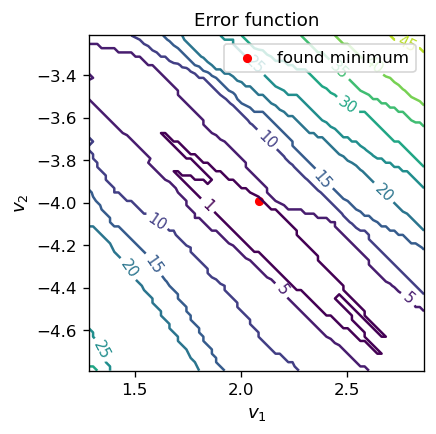

In [15]:
fig, ax = plt.subplots(figsize=(3.7,3.7),dpi=120)

delta = 0.02  # grid step in v1 and v2 for the contour map
ran=0.8       # plot range around (v1_o, v2_o)

v1 = np.arange(v1_o-ran,v1_o+ran, delta) # grid for v1
v2 = np.arange(v2_o-ran,v2_o+ran, delta) # grid for v2
X, Y = np.meshgrid(v1, v2) 

Z=np.array([[error(-1,-v1[i],-v2[j],samp2,func.step) 
             for i in range(len(v1))] for j in range(len(v2))]) # values of E(v1,v2) 

CS = ax.contour(X, Y, Z, [1,5,10,15,20,25,30,35,40,45,50])
ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=9) # contour labels

ax.set_title('Error function', fontsize=11)
ax.set_aspect(aspect=1)

ax.set_xlabel('$v_1$', fontsize=11)
ax.set_ylabel('$v_2$', fontsize=11)

ax.scatter(v1_o, v2_o, s=20,c='red',label='found minimum') # our found optimal point

ax.legend(); 

We can see in the above plot that that the found minimum is in (or close to, depending on the simulation) the elongated region of $ v_1 $ and $ v_2$ where the error vanishes. 

## Continuous activation function

In [16]:
print(Z)

[[31. 31. 30. ...  3.  3.  3.]
 [30. 30. 28. ...  3.  3.  3.]
 [30. 28. 27. ...  3.  3.  3.]
 ...
 [ 5.  5.  5. ... 46. 46. 46.]
 [ 6.  6.  6. ... 46. 47. 47.]
 [ 6.  6.  6. ... 47. 47. 48.]]


Coming back to the contour chart above, we can see that the lines are "serrated". This is because the error function, for an obvious reason, assumes integer values. It is therefore discontinuous and non-differentiable. The discontinuities originate from the discontinuous activation function, i.e. the step function. Having in mind the techniques we will get to know soon, it is advantageous to use continuous activation functions. Historically, the so-called **sigmoid**

$$ \sigma(s)=\frac{1}{1+e^{-s}}$$

has been used in many practical applications of ANNs.

In [17]:
# sigmoid, a.k.a. the logistic function, or simply (1+arctanh(-s/2))/2 
def sig(s):
    return 1/(1+np.exp(-s))

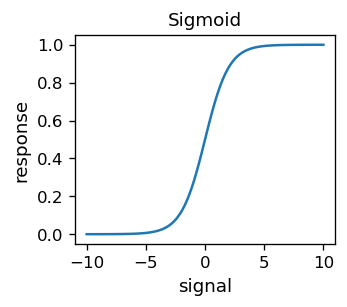

In [18]:
draw.plot(sig,start=-10,stop=10,title='Sigmoid');

This function is of course differentiable. Moreover,

$$ \sigma '(s) = \sigma (s) [1- \sigma (s)], $$

which is its special feature.

In [19]:
# derivative of sigmoid
def dsig(s):
     return sig(s)*(1-sig(s))

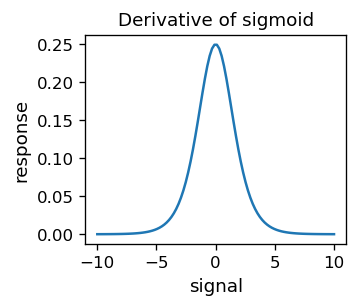

In [20]:
draw.plot(dsig,start=-10,stop=10,title='Derivative of sigmoid'); 

A sigmoid with "temperature" $ T $ is also introduced (this nomenclature is associated with similar expressions for thermodynamic functions in physics):

$$\sigma(s;T)=\frac{1}{1+e^{-s/T}}.$$

In [21]:
# sigmoid with temperature T
def sig_T(s,T):
    return 1/(1+np.exp(-s/T))

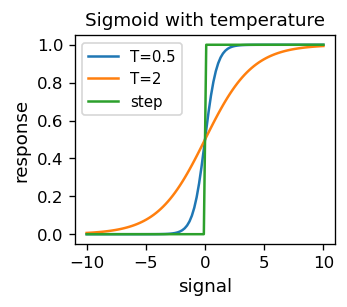

In [22]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [sig_T(z,.5) for z in s]
plt.plot(s, fs)
fs = [sig_T(z,2) for z in s]
plt.plot(s, fs)
fs = [func.step(z) for z in s]
plt.plot(s, fs)

plt.title("Sigmoid with temperature", fontsize=11)
plt.legend(('T=0.5','T=2','step'),fontsize=9)

plt.xlabel('signal',fontsize=11)
plt.ylabel('response',fontsize=11);

```{note}
For smaller and smaller $ T $, the sigmoid approaches the previously used step function. Note that the argument of the sigmoid is the quotient

$$ s / T = (w_0 + w_1 x_1 + w_2 x_2) / T = w_0 / T + w_1 / T \, x_1 + w_2 / T \, x_2 = \xi_0 + xi_1 x_1 + xi_2 x_2 $$,

which means that we can always assume $ T = 1 $ without losing generality ($ T $ is the "scale"). However, we now have three independent arguments $ \xi_0 $, $ \xi_1 $, and $ \xi_2$. Thus, it is impossible to reduce the situation to two independent parameters, as was the case above.
```

We now repeat our previous example with the classifier, but with the activation function given by the sigmoid. The error function, with 

$$y_o^{(p)}=\sigma(w_0+w_1 x_1^{(p)} +w_2 x_2^{(p)}). $$ 

becomes

$$E(w_0,w_1,w_2)=\sum_p \left [\sigma(w_0+w_1 x_1^{(p)} +w_2 x_2^{(p)})-y_t^{(p)} \right]^2.$$

We run the perceptron algorithm with the sigmoid activation function 1000 times:

In [23]:
weights=[[func.rn()],[func.rn()],[func.rn()]]      # random weights from [-0.5,0.5]

print("   w0   w1/w0  w2/w0 error")   # header

eps=0.7                       # initial learning speed
for r in range(1000):         # rounds
    eps=0.9995*eps            # decrease learning speed
    weights=teach_perceptron(samp2,eps,weights,func.sig) # update weights
    if r%100==99:
        w0_o=weights[0][0]               # updated weights 
        w1_o=weights[1][0] 
        w2_o=weights[2][0] 
        v1_o=w1_o/w0_o
        v2_o=w2_o/w0_o
        print(np.round(w0_o,3),np.round(v1_o,3),np.round(v2_o,3),
              np.round(error(w0_o, w0_o*v1_o, w0_o*v2_o, samp2, func.sig),5))                             


   w0   w1/w0  w2/w0 error
-20.294 2.047 -4.027 0.70907
-25.019 2.095 -4.105 0.49241
-28.223 2.119 -4.14 0.43472
-30.701 2.133 -4.157 0.40624
-32.73 2.141 -4.165 0.38361
-34.448 2.146 -4.169 0.3623
-35.934 2.15 -4.17 0.34178
-37.236 2.152 -4.17 0.32231
-38.392 2.154 -4.169 0.30412
-39.425 2.155 -4.167 0.28733


We notice the decrease of the error as the simulation proceeds. The error function now has three independent arguments, so it cannot be drawn in two dimensions. We can, however, look at its projections, e.g. with a fixed value of $ w_0 $.

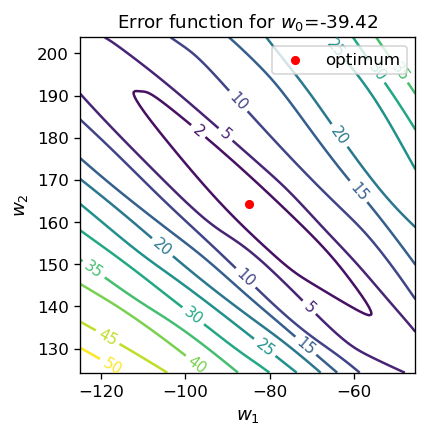

In [24]:
fig, ax = plt.subplots(figsize=(3.7,3.7),dpi=120)

delta = 0.5
ran=40 
r1 = np.arange(w1_o-ran, w1_o+ran, delta) 
r2 = np.arange(w2_o-ran, w2_o+ran, delta) 
X, Y = np.meshgrid(r1, r2) 

Z=np.array([[error(w0_o,r1[i],r2[j],samp2,func.sig) 
             for i in range(len(r1))] for j in range(len(r2))])  

CS = ax.contour(X, Y, Z,[0,2,5,10,15,20,25,30,35,40,45,50])
ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=9)

ax.set_title('Error function for $w_0$='+str(np.round(w0_o,2)), fontsize=11)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=11)
ax.set_ylabel('$w_2$', fontsize=11)

ax.scatter(w1_o, w2_o, s=20,c='red',label='optimum') # our found optimal point

ax.legend();


```{note}
In the present example, when we carry out more and more iterations, we notice that the magnitude of weights becomes lager and lager, while the error naturally gets smaller. The reason is following: our data sample is separable, so in the case when the step function is used for activation, it is possible to separate the sample with the dividing line and get down with the error all the way to zero. In the case of the sigmoid, there is always some (tiny) contribution to the error, as the values of the function are un the range (0,1). As we have discussed above, in the sigmoid, whose argument is $ (w_0 + w_1 x_1 + w_2 x_2) / T$, increasing the weights is equivalent to scaling down the temperature $T$. Then, ultimately, the sigmoid approaches the step function, and the error tends to zero. Precisely this behavior is seen in the simulations above. 
```

## Steepest descent

As we can see, the issue of optimizing the weights is reduced to a generic problem of minimizing a multi-variable function. This is a standard (though in general difficult) problem in mathematical analysis and numerical methods. The problems with finding the minimum of multivariable functions are well known:

- there may be local minima, and therefore it may be difficult to find the global minimum;

- the minimum can be at infinity (that is, it does not exist mathematically);

- The function around the minimum can be very flat, so the gradient is very small, and the update in gradient methods is extremely slow;

Overall, numerical minimization of functions is an art! Many methods have been developed and a proper choice for a given problem is crucial for success. Here we apply the simplest **steepest descent** method.  

For a differentiable function of multiple variables, $ F (z_1, z_2, ..., z_n) $, locally the steepest slope is defined by minus the gradient of the function $ F $, i.e. the steepest slope is in the direction of the vector

$$-\left (\frac{\partial F}{\partial z_1}, \frac{\partial F}{\partial z_2}, ..., 
\frac{\partial F}{\partial z_n} \right ), $$

where the partial derivatives are defined as the limit

$$\frac{\partial F}{\partial z_1} =  \lim _ {\Delta \to 0} \frac {F (z_1 + \Delta, z_2, ..., z_n) -F (z_1, z_2, ..., z_n)} { \Delta}, $$

and similarly for the other $ z_i $.

The method of finding the minimum of a function by the steepest descent is given by the iterative algorithm, where we update the coordinates (of a searched minimum) at each iteration step $m$ (shown in superscripts) with

$$z_{i}^{(m+1)} = z_i^{(m)} - \epsilon  \, \frac{\partial F}{\partial z_i}. $$ 

In our specific case, we minimize the error function 

$$E(w_0,w_1,w_2)= \sum_p [y_o^{(p)}-y_t^{(p)}]^2=\sum_p [\sigma(s^{(p)})-y_t^{(p)}]^2=\sum_p [\sigma(w_0  x_0^{(p)}+w_1 x_1^{(p)} +w_2 x_2^{(p)})-y_t^{(p)}]^2. $$

We use the chain rule to evaluate the derivatives.

```{admonition} Chain rule

For a composite function

$[f(g(x))]' = f'(g(x)) g'(x)$.

For a composition of more functions $[f(g(h(x)))]' = f'(g(h(x))) \,g'(h(x)) \,h'(x)$, etc. 
```

This yields 

$$ \frac{\partial E}{\partial w_i} = \sum_p 2[\sigma(s^{(p)})-y_t^{(p)}]\, \sigma'(s^{(p)}) \,x_i^{(p)} = \sum_p 2[\sigma(s^{(p)})-y_t^{(p)}]\, \sigma(s^{(p)})\, [1-\sigma(s^{(p)})] \,x_i^{(p)}$$

(derivative of square function $ \times $ derivative of the sigmoid $ \times $ derivative of $ s ^ {(p)} $), where we have used the special property of the sigmoid derivative in the last equality. The steepest descent method updates the weights as follows:

$$w_i \to w_i - \varepsilon (y_o^{(p)} -y_t^{(p)}) y_o^{(p)} (1-y_o^{(p)}) x_i.$$

Note that updating always occurs, because the response $ y_o^ {(p)} $ is never strictly 0 or 1 for the sigmoid, whereas
the true value (label) $ y_t ^ {(p)} $ is 0 or 1.

Because $ y_o ^ {(p)} (1-y_o ^ {(p)}) = \sigma (s ^ {(p)}) [1- \sigma (s ^ {(p)})] $ is nonzero only around $ s ^ {(p)} = $ 0 (see the sigmoid's derivative plot earlier), the updating occurs only near the threshold. This is fine, as the "problems" with misclassification happen near the dividing line.

```{note}
For comparison, the earlier perceptron algorithm is structurally very similar,

$$w_i \to w_i - \varepsilon \,(y_o^{(p)} - y_t^{(p)}) \, x_i,$$

but here the updating occurs for all points of the sample, not just near the threshold.
```

The code for the learning algorithm with the steepest descent update of weights is following:

In [27]:
def teach_sd(sample, eps, w_in, f=func.sig): # Steepest descent for the perceptron
    
    [[w0],[w1],[w2]]=w_in              # initial weights
    for i in range(len(sample)):       # loop over the data sample
        for k in range(10):            # repeat 10 times 
            
            yo=f(w0+w1*sample[i,0]+w2*sample[i,1])  # obtained answer for pont i

            w0=w0+eps*(sample[i,2]-yo)*yo*(1-yo)*1            # update of weights
            w1=w1+eps*(sample[i,2]-yo)*yo*(1-yo)*sample[i,0]
            w2=w2+eps*(sample[i,2]-yo)*yo*(1-yo)*sample[i,1]
    return [[w0],[w1],[w2]]

Its performance is similar to perceptron algorithm studied above.

In [28]:
weights=[[func.rn()],[func.rn()],[func.rn()]]      # random weights from [-0.5,0.5]

print("   w0   w1/w0  w2/w0 error")   # header

eps=0.7                       # initial learning speed
for r in range(1000):         # rounds
    eps=0.9995*eps            # decrease learning speed
    weights=teach_sd(samp2,eps,weights) # update weights
    if r%100==99:
        w0_o=weights[0][0]               # updated weights 
        w1_o=weights[1][0] 
        w2_o=weights[2][0] 
        v1_o=w1_o/w0_o
        v2_o=w2_o/w0_o
        print(np.round(w0_o,3),np.round(v1_o,3),np.round(v2_o,3),
              np.round(error(w0_o, w0_o*v1_o, w0_o*v2_o, samp2, func.sig),5))                                          

   w0   w1/w0  w2/w0 error
-9.922 2.045 -4.066 1.71663
-12.34 2.084 -4.109 1.3084
-13.963 2.106 -4.131 1.11614
-15.216 2.119 -4.144 0.99522
-16.242 2.127 -4.15 0.90891
-17.11 2.133 -4.154 0.84295
-17.859 2.137 -4.156 0.79043
-18.516 2.14 -4.157 0.74747
-19.099 2.143 -4.158 0.71167
-19.619 2.145 -4.158 0.6814


(bpa-lab)=
## Backprop algorithm

The material of this section is absolutely **crucial** for the understanding of the very important idea of training neural networks via supervised learning. At the same time, it can be quite difficult for people less familiar with mathematical analysis, as there appear derivations and formulas with rich notation. However, the material cannot be presented simpler than below, keeping the necessary accuracy.

The formulas we derive step by step here constitute the famous **back propagation algorithm (backprop)** {cite}`bryson1969` for updating the weights of a multi-layer network. It uses just two ingredients:

- the **chain rule** for computing the derivative of a composite function, known to you from the mathematical analysis, and
- **steepest descent method**, explained in the previous lecture.

We formulate the backprop algorithm for a perceptron with any number of neuron layers, $l$. The neurons in intermediate layers $j=1,\dots,l-1$ are numbered with corresponding indices $\alpha_j=0,\dots,n_j$, with 0 indicating the bias node. In the output layer, having no bias node, the numbering is $\alpha_l=1,\dots,n_l$.
The error function, as introduced earlier, is a sum over the points of the training sample and, additionally, over the nodes in the output layer:

$$
E(\{w\})=\sum_p \sum_{\alpha_l=1}^{n_l} \left[ y_{o,{\alpha_l}}^{(p)}(\{w\})-y_{t,{\alpha_l}}^{(p)}\right]^2,
$$ 

where $ \{w \} $ represent all the network weights.
We will deal with a single point contribution to $E$, denoted as $ e $.
It is a sum over all neurons in the output layer:

$$
e(\{w\})= \sum_{{\alpha_l}=1}^{n_l}\left[ y_{o,{\alpha_l}}-y_{t,{\alpha_l}}\right]^2, 
$$

where we have dropped the superscript $(p)$ for brevity.
For neuron $\alpha_j$ in layer $j$ the entering signal is

$$
s_{\alpha_j}^{j}=\sum_{\alpha_{j-1}=0}^{n_{j-1}} x_{\alpha_{j-1}}^{j-1} w_{\alpha_{j-1} \alpha_j}^{j}.
$$

The outputs from the output layer are 

$$
y_{o,{\alpha_l}}=f\left( s_{\alpha_l}^{l} \right)
$$


whereas the output signals in the intermediate layers $j=1,\dots,l-1$ are

$$
x_{\alpha_j}^{j}=f \left ( s_{\alpha_j}^{j}\right ),\;\;\;\alpha_{j}=1,\dots,n_j, \;\;\; {\rm and} \;\;\; x_0^{j}=1,
$$

with the bias node having the value 1.

Subsequent explicit substitutions of the above formulas into $e$ are as follows:


$e = \sum_{{\alpha_l}=1}^{n_l}\left( y_{o,{\alpha_l}}-y_{t,{\alpha_l}}\right)^2$

$=\sum_{{\alpha_l}=1}^{n_l} \left( f \left (\sum_{\alpha_{l-1}=0}^{n_{l-1}} x_{\alpha_{l-1}}^{l-1} w_{\alpha_{l-1} {\alpha_l}}^{l} \right )-y_{t,{\alpha_l}} \right)^2$

$=\sum_{{\alpha_l}=1}^{n_l} \left( 
f \left (\sum_{\alpha_{l-1}=1}^{n_{l-1}} f \left( \sum_{\alpha_{l-2}=0}^{n_{l-2}} x_{\alpha_{l-2}}^{l-2} w_{\alpha_{l-2} \alpha_{l-1}}^{l-1}\right) w_{\alpha_{l-1} {\alpha_l}}^{l} + x_0^{l-1} w_{0 \gamma}^{l} \right)-y_{t,{\alpha_l}} \right)^2$

$=\sum_{{\alpha_l}=1}^{n_l} \left( 
f \left (\sum_{\alpha_{l-1}=1}^{n_{l-1}} f\left( 
\sum_{\alpha_{l-2}=1}^{n_{l-2}} f\left( \sum_{\alpha_{l-3}=0}^{n_{l-3}} x_{\alpha_{l-3}}^{l-3} w_{\alpha_{l-3} \alpha_{l-2}}^{l-2}\right) w_{\alpha_{l-2} \alpha_{l-1}}^{l-1} + 
x_{0}^{l-2} w_{0 \alpha_{l-1}}^{l-1}
 \right)  w_{\alpha_{l-1} {\alpha_l}}^{l} + x_0^{l-1} w_{0 {\alpha_l}}^{l} \right)-y_{t,{\alpha_l}} \right)^2$

$=\sum_{{\alpha_l}=1}^{n_l} \left( 
f \left (\sum_{\alpha_{l-1}=1}^{n_{l-1}} f\left( 
\dots f\left( \sum_{\alpha_{0}=0}^{n_{0}} x_{\alpha_{0}}^{0} w_{\alpha_{0} \alpha_{1}}^{1}\right) w_{\alpha_{1} \alpha_{2}}^{2} + 
x_{0}^{1} w_{0 \alpha_{2}}^{2} \dots
 \right)  w_{\alpha_{l-1} {\alpha_l}}^{l} + x_0^{l-1} w_{0 {\alpha_l}}^{l} \right)-y_{t,{\alpha_l}} \right)^2$

Calculating successive derivatives with respect to the weights, and going backwards, i.e. from $j=l$ down to 1, we get (the evaluation requires diligence and noticing the emerging regularity)


$$
\frac{\partial e}{\partial w^j_{\alpha_{j-1} \alpha_j}} = x_{\alpha_{j-1}}^{j-1} D_{\alpha_j}^{j} , \;\;\; \alpha_{j-1}=0,\dots,n_{j-1}, \;\; \alpha_{j}=1,\dots,n_{j},
$$ 

where

$D_{\alpha_l}^{l}=2 (y_{o,\alpha_l}-y_{t,\alpha_l})\, f'(s_{\alpha_l}^{l})$,

$D_{\alpha_j}^{j}= \sum_{\alpha_{j+1}} D_{\alpha_{j+1}}^{j+1}\, w_{\alpha_j \alpha_{j+1}}^{j+1} \, f'(s_{\alpha_j}^{j}), ~~~~ j=l-1,l-2,\dots,1$.

The last expression is a recurrence going backward. We note that to obtain $D^j$, we need $D^{j+1}$, which we have already obtained in the previous step, as well as the signal $s^j$, which we know from the feed-forward stage. This recurrence provides a simplification in the evaluation of derivatives and updating the weights. 

With the steepest descent prescription, the weights are updated as


$$ w^j_{\alpha_{j-1} \alpha_j} \to  w^j_{\alpha_{j-1} \alpha_j} -\varepsilon x_{\alpha_{j-1}}^{j-1} D_{\alpha_j}^{j}, $$ 



For the case of the sigmoid we can use

$$
\sigma'(s_A^{(i)})=\sigma'(s_A^{(i)}) (1-\sigma'(s_A^{(i)})) =x_A^{(i)}(1-x_A^{(i)}).
$$

```{note}

The above formulas explain the name **back propagation**, because in updating the weights we start from the last layer and then we go back recursively to the beginning of the network. At each step, we need only the signal in the given layer and the properties of the next layer! These features follow from 
1) the feed-forward nature of the network, and 
2) the chain rule in evaluation of derivatives.
```

If activation functions are different in various layers (denote them with $f_j$ for layer $j$), then there is an obvious modification:

$D_{\alpha_l}^{l}=2 (y_{o,\alpha_l}-y_{t,\alpha_l})\, f_l'(s_{\alpha_l}^{l})$, 

$D_{\alpha_j}^{j}= \sum_{\alpha_{j+1}} D_{\alpha_{j+1}}^{j+1}\, w_{\alpha_j \alpha_{j+1}}^{j+1} \, f_j'(s_{\alpha_j}^{j}), ~~~~ j=l-1,l-2,\dots,1$. 

### Code for backprop

Next, we present a simple code that carries out the backprop algorithm. It is a straightforward implementation of the formulas derived above. In the code, we keep as much as we can the notation from the above derivation.

The code has 12 lines only, not counting the comments!

In [29]:
def back_prop(fe,la, p, ar, we, eps,f=func.sig,df=func.dsig):
    """
    fe - array of features
    la - array of labels
    p  - index of the used data point
    ar - array of numbers of nodes in subsequent layers
    we - disctionary of weights
    eps - learning speed 
    f   - activation function
    df  - derivaive of f
    """
 
    l=len(ar)-1 # number of neuron layers (= index of the output layer)
    nl=ar[l]    # number of neurons in the otput layer  
   
    x=func.feed_forward(ar,we,fe[p],ff=f) # feed-forward of point p
   
    # formulas from the derivation in a one-to-one notation:
    
    D={}                 
    D.update({l: [2*(x[l][gam]-la[p][gam])*
                    df(np.dot(x[l-1],we[l]))[gam] for gam in range(nl)]})   
    we[l]-=eps*np.outer(x[l-1],D[l]) 
    
    for j in reversed(range(1,l)):           
        u=np.delete(np.dot(we[j+1],D[j+1]),0) 
        v=np.dot(x[j-1],we[j])          
        D.update({j: [u[i]*df(v[i]) for i in range(len(u))]}) 
        we[j]-=eps*np.outer(x[j-1],D[j])      

(circ-lab)=
## Example with the circle

We illustrate the code on the example of a binary classifier of points inside a circle. 


In [30]:
def cir():
    x1=np.random.random()                  # coordinate 1
    x2=np.random.random()                  # coordinate 2
    if((x1-0.5)**2+(x2-0.5)**2 < 0.4*0.4): # inside circle, radius 0.4, center (0.5,0.5)
        return np.array([x1,x2,1])
    else:                                  # outside
        return np.array([x1,x2,0])


For future generality **(new convention)**, we split the sample into an array of **features** and **labels**:

In [32]:
sample_c=np.array([cir() for _ in range(3000)]) # sample
features_c=np.delete(sample_c,2,1)
labels_c=np.delete(np.delete(sample_c,0,1),0,1)

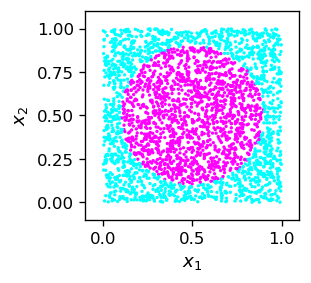

In [33]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(sample_c[:,0],sample_c[:,1],c=sample_c[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

We choose the following architecture and initial parameters:

In [34]:
arch_c=[2,4,4,1]                  # architecture
weights=func.set_ran_w(arch_c,10) # scaled random initial weights
eps=.7                            # initial learning speed 

The simulation takes a few minutes, 

In [36]:
for k in range(300):   # rounds
    eps=.995*eps       # decrease learning speed
    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop(features_c,labels_c,p,arch_c,weights,eps,
                       f=func.sig,df=func.dsig) # backprop

100  200  300  

whereas testing is very fast: 

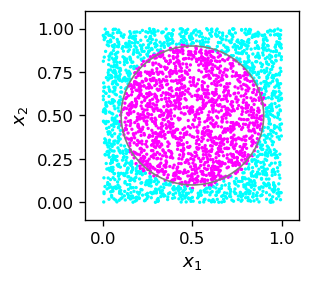

In [38]:
test=[] 

for k in range(3000):
    po=[np.random.random(),np.random.random()] 
    xt=func.feed_forward(arch_c,weights,po,ff=func.sig)   
    test.append([po[0],po[1],np.round(xt[len(arch_c)-1][0],0)])

tt=np.array(test)

fig=plt.figure(figsize=(2.3,2.3),dpi=120)

# drawing the circle
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='gray', fill=False)
ax.add_patch(circ)

plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

The trained network looks like this: 

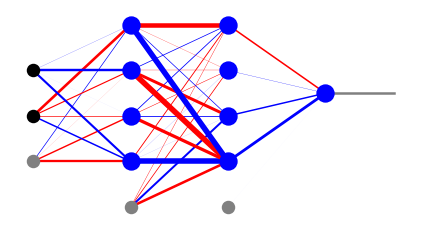

In [26]:
fnet=draw.plot_net_w(arch_c,weights,.1);

In [27]:
# fnet.savefig('images/cir3.png', bbox_inches='tight')

```{note}
It is fascinating that we have trained the network to recognize if a point is in a circle, and it has no concept whatsoever of geometry, Euclidean distance, equation of the circle, etc. The network has just learned "empirically" how to proceed, using a training sample!
```

```{note}
The result in the plot is very good, perhaps except, as always, near the boundary. In view of our discussion of chapter {ref}`more-lab`, where we have set the weights of a network with three neuron layers from geometric considerations, the quality of the present result is stunning. We do not see any straight sides of a polygon, but a nicely rounded boundary.  

```

```{admonition} Local minima
:class: important

We have mentioned before the emergence of local minima in multi-variable optimization as a potential problem. In the figure below we show three different results of the backprop code for our classifier of points in a circle. We note that each of them has a radically different set of optimum weights, whereas the results on the test sample are, at least by eye, equally good for each case. This shows that the backprop optimization ends up, as anticipated, in different local minima. However, each of these local minima works well and equally good. This is actually the reason why backprop can be used in practical problems: there are zillions of local minima, but it does not matter! 
```

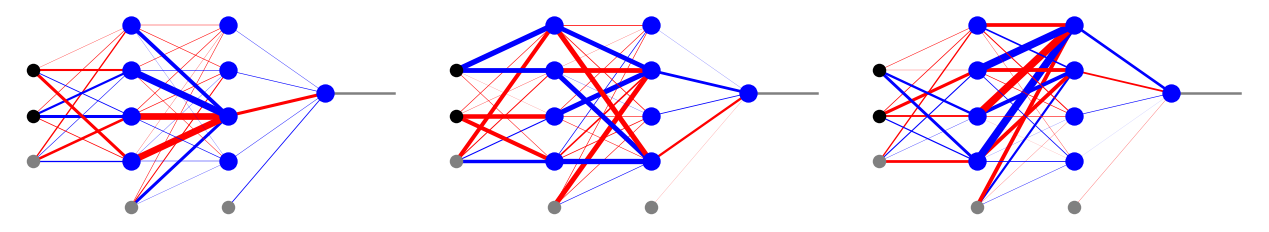

In [35]:
Image(filename="images/cir1-3.png",width=800)

## General remarks

There are some more important and general observations:


```{note}

- Supervised training of an ANN takes a very long time, but using a trained ANN takes a blink of an eye. The asymmetry originates from the simple fact that the multi-parameter optimization takes very many function calls (here **feed-forward**) and evaluations of derivatives, but the usage on a point involves just one function call.

- The classifier trained with backprop may work inaccurately for the points near the boundary lines. A remedy is to trained more for improvement, and/or increase the 
size of the training sample, in particular near the boundary.

- However, a too long learning on the same training sample does not actually make sense, because the accuracy stops improving at some point.

- Local minima occur in backprop, but this is by no means an obstacle to the use of the algorithm. This is an important practical feature.

- Various improvements of the steepest descent method, or altogether different minimization methods may be used (see exercises). They can largely increase the efficiency of the algorithm.

- When going backwards with updating the weights in subsequent layers, one may introduce an increasing factor (see exercises). This helps with performance.

- Finally, different activation functions may be used to improve performance (see the following lectures).
```

## Exercises

```{admonition} $~$
:class: warning

1. Prove (analytically) by evaluating the derivative that $ \sigma '(s) = \sigma (s) [1- \sigma (s)]$. Show that the sigmoid is the **only** function with this property.

2. Modify the lecture example of the classifier of points in a circle by replacing the figure with

    - semicircle;
    - two disjoint circles;
    - ring;
    - any of your favorite shapes.

3. Repeat 2., experimenting with the number of layers and neurons, but remember that a large number of them increases the computation time and does not necessarily improve the result. Rank each case by the fraction of misclassified points in a test sample. Find an optimum architecture for each of the considered figures.  

4. If the network has a lot of neurons and connections, little signal flows through each synapse, hence the network is resistant to a small random damage. This is what happens in the brain, which is constantly "damaged" (cosmic rays, alcohol, ...). Besides, such a network after destruction can be (already with a smaller number of connections) retrained. Take your trained network from problem 2. and remove one of its **weak** connections, setting the corresponding weight to 0. Test this damaged network on a test sample and draw conclusions.


5. **Scaling weights in back propagation.**
A disadvantage of using the sigmoid in the backprop algorithm is a very slow update of weights in layers distant from the output layer (the closer to the beginning of the network, the slower). A remedy here is a re-scaling of the weights, where the learning speed in the layers, counting from the back, is successively increased by a certain factor. We remember that successive derivatives contribute factors of the form $ \sigma '(s) = \sigma (s) [1- \sigma (s)] = y (1-y) $ to the update rate, where $ y $ is in the range $ (0, 1) $. Thus the value of $ y (1-y $ cannot exceed 1/4, and in the subsequent layers (counting from the back) the product $ [y (1-y] ^ n \le 1/4 ^ n$. 
To prevent this "shrinking", the learning rate can be multiplied by compensating factors $ 4 ^ n $: $ 4, 16, 64, 256, ... $.  Another heuristic argument {cite}`rigler1991` suggests even faster growing factors of the form $ 6 ^ n $: $ 6, 36, 216, 1296, ... $

    - Enter the above recipes into the code for backprop.

    - Check if they improve the algorithm performance for deeper networks, for instance for the circle point classifier, etc.

    - For assessment of performance, carry out the execution time measurement (e.g., using the Python **time** library packet).

6. **Steepest descent improvement.**
The method of the steepest descent of finding the minimum of a function of many variables used in the lecture depends on the local gradient. There are much better approaches that give a faster convergence to the (local) minimum. One of them is the recipe of [Barzilai-Borwein](https://en.wikipedia.org/wiki/Gradient_descent) explained below. Implement this method in the back propagation algorithm. Vectors $x$ in $n$-dimensional space are updated in subsequent iterations as $ x^{(m + 1)} = x^{(m)} - \gamma_m \nabla F (x^{(m)})$,
where $m$ numbers the iteration, and the speed of learning depends on the behavior at the two (current and previous) points:

$$ \gamma _ {m} = \frac {\left | \left (x^{(m)}-x^{(m-1)} \right) \cdot
\left [\nabla F (x^{(m)}) - \nabla F (x^{(m-1)}) \right] \right |}
{\left \| \nabla F (x^{(m)}) - \nabla F (x^{(m-1)}) \right \| ^ {2}}.
$$
    
```